<a href="https://colab.research.google.com/github/Manuelstv/stock-market-monkeys/blob/main/monkey_stocks_vers%C3%A3o_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A ideia do meu código é formar um conjunto de carteiras aleatorias (pesos iguais para cada ativo) e comparar o desempenho dessas carteiras com o desempenho do ibovespa, por serem aleatorias diriamos que é como se elas tivessem sido feita por um macaco. Os resultados foram supreendentes: quando se montam carteiras minimamente diversificadas, o percentual de carteiras que consegue bater o indice se torna proximo de 70~80%. Quanto maior a diversificação, maior é o numero de carteiras que bateram o mercado. 

Na prática, o resultado é surpreendente: pense que muitos gestores de fundo tem problemas para bater o indice (https://verios.com.br/blog/so-44-dos-fundos-de-acoes-ativos-batem-ibovespa-em-3-anos/). No entanto, se montarmos uma carteira bem diversificada, com pesos iguais e formada por ações aleatorias já temos uma altissima chance de superar o mercado.

# **Carregar bibliotecas**

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#dados yahoo
import pandas_datareader.data as web

import seaborn as sns
import random
import numpy as np

#corrigir bug do yahoo finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=442c7650abb39a40e3b5377dbcfffddedd3564eceda9b67a0e7ad9b800135992
  Stored in directory: /tmp/pip-ephem-wheel-cache-f567fpzo/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


# **Coletar dados dos volumes**

In [ ]:
start = "2000-01-01"
end="2020-08-15"
# ATENÇÃO: EXISTEM ERROS NO YAHOO FINANCE PARA BRAP3, ENGI3 E TIET3,FORAM REMOVIDAS MANUALMENTE NA LISTAGEM ABAIXO
#Lista apenas para ON
tickers_ibov = "ITUB3.SA RADL3.SA ODER3.SA BAUH3.SA MAPT3.SA LIQO3.SA SPRI3.SA RANI3.SA TASA13.SA SBSP3.SA TASA3.SA LREN3.SA HETA3.SA EEEL3.SA BRSR3.SA PATI3.SA GOAU3.SA PNVL3.SA LUXM3.SA CGRA3.SA KEPL3.SA FNCN3.SA STTR3.SA RCSL3.SA UCAS3.SA SANB3.SA MNPR3.SA GRND3.SA KLBN3.SA LUPA3.SA SLCE3.SA RAPT3.SA PTNT3.SA POMO3.SA MNDL3.SA FRAS3.SA HBTS3.SA JOPA3.SA FRTA3.SA MTSA3.SA RSUL3.SA SHUL3.SA MWET3.SA DOHL3.SA TUPY3.SA WEGE3.SA CLSC3.SA PTBL3.SA TXRX3.SA EALT3.SA CTKA3.SA TEKA3.SA CASN3.SA POSI3.SA MTIG3.SA HGTX3.SA INEP3.SA OIBR3.SA SAPR3.SA CPLE3.SA CRFB3.SA CYRE3.SA TEND3.SA BEEF3.SA VIVR3.SA RDNI3.SA CAML3.SA PINE3.SA AHEB13.SA AHEB3.SA CGAS3.SA REDE3.SA ITSA3.SA DASA3.SA BALM3.SA AZEV3.SA AMAR3.SA APTI3.SA MYPK3.SA ETER3.SA CAMB3.SA ESTR3.SA ALPA3.SA NAFG3.SA RSID3.SA MGEL3.SA IDVL3.SA CALI3.SA CESP3.SA USIM3.SA NORD3.SA BDLL3.SA FLRY3.SA BRIV3.SA BBDC3.SA MSPA3.SA NEMO3.SA JBDU3.SA JPSA3.SA SLED3.SA LEVE3.SA PMAM3.SA PPAR3.SA WHRL3.SA ODPV3.SA BMKS3.SA ROMI3.SA EUCA3.SA TOTS3.SA JSLG3.SA PLAS3.SA SMTO3.SA IGTA3.SA NUTR3.SA VULC3.SA CSAN3.SA BOBR3.SA LLIS3.SA HBOR3.SA MGLU3.SA PCAR3.SA BAHI3.SA PFRM3.SA CEAB3.SA EVEN3.SA IGBR3.SA AALR3.SA BTTL3.SA WIZS3.SA LOGN3.SA BRKM3.SA BRQB3.SA QUSW3.SA BRDT3.SA BMIN3.SA UNIP3.SA CEGR3.SA VIVA3.SA GGBR3.SA VALE3.SA TKNO3.SA RPMG3.SA SOND3.SA IRBR3.SA UGPA3.SA WLMM3.SA HOOT3.SA VLID3.SA TCNO3.SA MOAR3.SA CBEE3.SA CSNA3.SA VVAR3.SA MERC3.SA JFEN3.SA FCAP3.SA LAME3.SA PETR3.SA NTCO3.SA HAGA3.SA BPAC3.SA SULA3.SA NRTQ3.SA SCAR3.SA BEES3.SA MILS3.SA CTNM3.SA FHER3.SA MOVI3.SA CTSA3.SA OFSA3.SA GNDI3.SA CATA3.SA PARD3.SA PRNR3.SA RLOG3.SA BBSE3.SA MEAL3.SA CSMG3.SA CEDO3.SA BRGE3.SA BMEB3.SA CRIV3.SA RPAD3.SA MEND3.SA MMAQ3.SA CMIG3.SA RENT3.SA DIRR3.SA ARZZ3.SA SUZB3.SA BSEV3.SA CSAB3.SA FESA3.SA CEEB3.SA CRPG3.SA CORR3.SA SNSY3.SA ELEK3.SA BKBR3.SA CNTO3.SA BGIP3.SA MDNE3.SA QUAL3.SA APER3.SA ENAT3.SA BPHA3.SA FLEX3.SA CEPE3.SA CVCB3.SA PRIO3.SA ADHM3.SA AFLT3.SA LCAM3.SA INNT3.SA B3SA3.SA TECN3.SA ANIM3.SA OMGE3.SA OSXB3.SA LOGG3.SA DMMO3.SA TRIS3.SA YDUQ3.SA CCPR3.SA MSRO3.SA GSHP3.SA BBRK3.SA PTCA3.SA GPAR3.SA RNEW3.SA CEED3.SA CPRE3.SA GUAR3.SA ALUP3.SA MRVE3.SA CSRN3.SA EZTC3.SA JHSF3.SA IGSN3.SA LPSB3.SA TCSA3.SA CCXC3.SA MTRE3.SA TAEE3.SA CRDE3.SA MULT3.SA SGPS3.SA EMBR3.SA AGRO3.SA SMFT3.SA ABEV3.SA CNSY3.SA BNBR3.SA MDIA3.SA COCE3.SA CTCA3.SA BRPR3.SA BRML3.SA LINX3.SA ALSO3.SA TESA3.SA SMLS3.SA HAPV3.SA SEER3.SA BPAR3.SA BAZA3.SA EQPA3.SA FRIO3.SA BIOM3.SA ENEV3.SA ECOR3.SA SQIA3.SA ENBR3.SA MRFG3.SA ENMT3.SA LIGT3.SA DTCY3.SA EQTL3.SA TPIS3.SA TRPL3.SA GEPA3.SA PDGR3.SA HYPE3.SA JBSS3.SA SHOW3.SA CCRO3.SA COGN3.SA STBP3.SA MMXM3.SA VIVT3.SA TIMP3.SA EGIE3.SA CPFE3.SA RAIL3.SA IDNT3.SA LMED3.SA LWSA3.SA TGMA3.SA EKTR3.SA EMAE3.SA GPCP3.SA PSSA3.SA ECPR3.SA PEAB3.SA CARD3.SA BRFS3.SA FIGE3.SA GFSA3.SA BBML3.SA LIPR3.SA NEOE3.SA CIEL3.SA VSPT3.SA BTOW3.SA STKF3.SA BIDI3.SA ATOM3.SA TELB3.SA CMSA3.SA CEBR3.SA ELET3.SA BSLI3.SA BBAS3.SA"
dados_yahoo_vol = web.get_data_yahoo(tickers = tickers_ibov,start = start, end = end)["Volume"]

[*********************100%***********************]  324 of 324 completed

31 Failed downloads:
- PTCA3.SA: No data found, symbol may be delisted
- SMFT3.SA: No data found, symbol may be delisted
- NEMO3.SA: No data found, symbol may be delisted
- CATA3.SA: No data found, symbol may be delisted
- STKF3.SA: No data found for this date range, symbol may be delisted
- APTI3.SA: No data found, symbol may be delisted
- RSUL3.SA: No data found, symbol may be delisted
- CMSA3.SA: No data found, symbol may be delisted
- TASA13.SA: No data found for this date range, symbol may be delisted
- NRTQ3.SA: No data found, symbol may be delisted
- CCXC3.SA: No data found, symbol may be delisted
- FCAP3.SA: No data found for this date range, symbol may be delisted
- SOND3.SA: No data found, symbol may be delisted
- BRQB3.SA: No data found for this date range, symbol may be delisted
- HBTS3.SA: No data found for this date range, symbol may be delisted
- FLEX3.SA: No data found, symbol may be delisted
- LM

# **Carrega dados da cotação**

obs: O macaco vai sortear qualquer ativo da lista, caso ele ainda não seja negociado na bolsa, o macaco deixa o dinheiro em caixa e aporta assim que o ativo começa a ser negociado 

In [ ]:
dados_yahoo = web.get_data_yahoo(tickers = tickers_ibov, start = start, end = end)["Adj Close"]

[*********************100%***********************]  324 of 324 completed

30 Failed downloads:
- PTCA3.SA: No data found, symbol may be delisted
- SMFT3.SA: No data found, symbol may be delisted
- NEMO3.SA: No data found, symbol may be delisted
- CATA3.SA: No data found, symbol may be delisted
- STKF3.SA: No data found for this date range, symbol may be delisted
- APTI3.SA: No data found, symbol may be delisted
- RSUL3.SA: No data found, symbol may be delisted
- CMSA3.SA: No data found, symbol may be delisted
- TASA13.SA: No data found for this date range, symbol may be delisted
- NRTQ3.SA: No data found, symbol may be delisted
- CCXC3.SA: No data found, symbol may be delisted
- FCAP3.SA: No data found for this date range, symbol may be delisted
- SOND3.SA: No data found, symbol may be delisted
- BRQB3.SA: No data found for this date range, symbol may be delisted
- HBTS3.SA: No data found for this date range, symbol may be delisted
- FLEX3.SA: No data found, symbol may be delisted
- LM

# **Calcula retornos e ajusta os dados**

In [ ]:
dados_yahoo = dados_yahoo*(dados_yahoo_vol/dados_yahoo_vol)

#removedor de erros do yahoo de mudança de escala/ordem de grandeza
retorno = dados_yahoo.pct_change()

retorno[retorno>5] = 0
retorno[retorno<-0.99] = 0

retorno_acum = (1+retorno).cumprod()
retorno_acum.iloc[0]=1

# **Filtro de liquidez**

In [ ]:
minimo = 1.00000
liquidez = pd.DataFrame(columns = list(retorno_acum))
#tira empresa que a média do retorno acumulado = 1.000
#na teoria poderia eliminar empresas com liquidez, na pratica as chances sao minimas
#empresas eliminadas: list(set(retorno_acum)- set(liquidez))
liquidez.loc[0] = retorno_acum.mean()
liquidez = liquidez[liquidez != minimo]
liquidez = liquidez.dropna(axis='columns')

In [ ]:
retorno_acum = retorno_acum[list(liquidez)]

# **Coleta dados do ibovespa**

In [ ]:
#as vezes ele reclama do ^BVSP, basta rodar de novo
ibov = web.get_data_yahoo(tickers = "^BVSP" , start = start, end=end)["Adj Close"]
ibov = ibov.dropna()
ibov = ibov/ibov.iloc[0]

[*********************100%***********************]  1 of 1 completed


# **Coleta dados da sua carteira teórica**

In [ ]:
tickers =  "radl3.sa mglu3.sa"

car = web.get_data_yahoo(tickers,start= start,end=end)["Adj Close"]
car.dropna(inplace = True)

car = car/car.iloc[0]
car['saldo'] = car.mean(axis=1)

[*********************100%***********************]  2 of 2 completed


# **Realiza comparações e plota gráficos para um numero fixo de ativos dos macacos**


Número de ações disponíveis: 283
Percentual de macacos que bateram o mercado: 66.7 %
Percentual de macacos que bateram a carteira teórica: 3.9 %
Média do retorno dos macacos: 15.016
Mediana do retorno dos macacos: 8.768
Desempenho do Ibovespa: 5.987



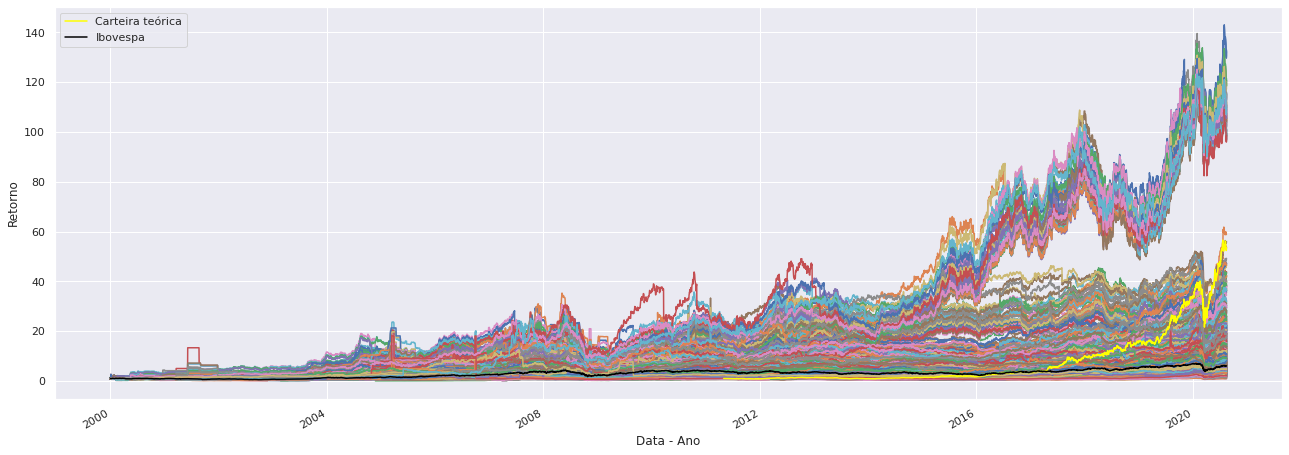

In [ ]:
sns.set()
#se tiver muitos ativos tem que setar alto
comp=3
comp2=1

ativos = 10
macacos = 1000

contador = 0
contador2 = 0

a = np.array([])
for i in range (macacos):

  carteira = random.sample(list(retorno_acum.columns), k=ativos)
  carteira = retorno_acum.loc[ : , carteira]
  #carteira = carteira.fillna(1.000000) ????
  carteira["saldo"] = carteira.mean(axis=1)
  a = np.append(a, carteira["saldo"].iloc[-1])
  carteira["saldo"].plot(figsize=(22,8), label='_nolegend_')

  #compara com o ibovespa
  if (carteira['saldo'].iloc[-1]> ibov.iloc[-1]):
      contador = contador + 1

  #compara com carteira teorica
  if (carteira['saldo'].iloc[-1]> car['saldo'].iloc[-1] ):
    contador2 = contador2 + 1

  #acha a pior carteira (desde que tenha desempenho menor que 1.5)
  if (carteira['saldo'].iloc[-1]<comp):

    comp = carteira['saldo'].iloc[-1]
    bad = carteira

  #acha a melhor carteira(desde que tenha desempenho positivo)
  if (carteira['saldo'].iloc[-1]>comp2):
    
    comp2 = carteira['saldo'].iloc[-1]
    good = carteira

car['saldo'].plot(label = "Carteira teórica",color = 'yellow')
ibov.plot(label = "Ibovespa",color = "black")

plt.legend()
plt.xlabel("Data - Ano")
plt.ylabel("Retorno")

print("Número de ações disponíveis: {}".format(len(list(retorno_acum))))
print("Percentual de macacos que bateram o mercado: {} %".format(contador*100/macacos))
print("Percentual de macacos que bateram a carteira teórica: {} %".format(contador2*100/macacos))
print("Média do retorno dos macacos: {:.3f}".format(np.mean(a)))
print("Mediana do retorno dos macacos: {:.3f}".format(np.median(a)))
print("Desempenho do Ibovespa: {:.3f}\n".format(ibov.iloc[-1]))

In [ ]:
lista = list(good.drop('saldo', axis =1))
lista = ", ".join(lista)
print("O melhor macaco obteve um retorno acumulado de {:.3f} e escolheu as ações {} ".format(good['saldo'].iloc[-1], lista))

display(good)

O melhor macaco obteve um retorno acumulado de 132.989 e escolheu as ações LOGN3.SA, RADL3.SA, CEAB3.SA, FRTA3.SA, PCAR3.SA, SMLS3.SA, TIMP3.SA, COCE3.SA, LIGT3.SA, WEGE3.SA 


,LOGN3.SA,RADL3.SA,CEAB3.SA,FRTA3.SA,PCAR3.SA,SMLS3.SA,TIMP3.SA,COCE3.SA,LIGT3.SA,WEGE3.SA,saldo
Date,,,,,,,,,,,
2000-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.036286,0.964896,1.000591
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.114194,0.964896,1.039545
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.208111,0.877194,1.042652
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.171825,0.877194,1.024510
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,0.224651,1001.555394,0.638632,0.044197,2.592822,1.571559,6.226932,2.942486,0.357117,338.400975,135.455476
2020-08-11,0.232583,987.988167,0.673766,0.044197,2.645005,1.644870,6.116581,2.942486,0.344824,330.454781,133.308726
2020-08-12,0.226917,963.532571,0.627299,0.044688,2.562446,1.574656,6.025936,2.942486,0.339824,333.544963,131.142179


In [ ]:
lista2 = list(bad.drop('saldo', axis =1))
lista2 = ", ".join(lista2)
print("O pior macaco obteve um retorno acumulado de {:.3f} e escolheu as ações {} ".format(bad['saldo'].iloc[-1], lista2))

display(bad)

O pior macaco obteve um retorno acumulado de 0.911 e escolheu as ações CTNM3.SA, UCAS3.SA, SLED3.SA, FRAS3.SA, RAIL3.SA, ADHM3.SA, MEND3.SA, JFEN3.SA, JBSS3.SA, MNPR3.SA 


,CTNM3.SA,UCAS3.SA,SLED3.SA,FRAS3.SA,RAIL3.SA,ADHM3.SA,MEND3.SA,JFEN3.SA,JBSS3.SA,MNPR3.SA,saldo
Date,,,,,,,,,,,
2000-01-03,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.225808,1.225808
2000-01-05,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.935485,1.467742
2000-01-06,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.580646,1.790323
2000-01-07,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.258065,1.629033
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,1.470918e-46,0.466060,0.150105,2.034679,1.800546,0.008195,0.833056,0.000001,3.613375,0.012034,0.891805
2020-08-11,1.468231e-46,0.453305,0.152346,2.046004,1.754883,0.008195,0.833056,0.000001,3.590328,0.012095,0.885021
2020-08-12,1.478978e-46,0.461154,0.150105,2.030905,1.773778,0.008381,0.833056,0.000001,3.682515,0.012235,0.895213


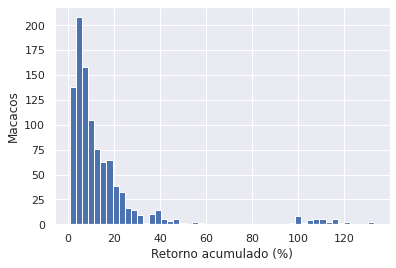

In [ ]:
ax = plt.hist(a,bins = int(macacos*0.05))
plt.ylabel('Macacos')
plt.xlabel('Retorno acumulado (%)')
plt.show()

# **analogo ao anterior para todos numeros de ativos possiveis**

In [ ]:
comm=''' sns.set()
macacos = 100

for ativos in range(1,dados_yahoo.shape[0]):
  contador = 0
  contador2 = 0
  for i in range (macacos):

    carteira = random.sample(list(dados_yahoo.columns), k=ativos)
    carteira = dados_yahoo.loc[ : , carteira]
    carteira["saldo"] = carteira.mean(axis=1)

    if (carteira['saldo'].iloc[-1]>ibov.iloc[-1]):
      contador = contador + 1

    a = car['saldo'].iloc[-1]
    if (carteira['saldo'].iloc[-1]>a):
      contador2 =contador2+1

  print("\nNúmero de ativos: {}".format(ativos))
  print ("Percentual de macacos que bateram o mercado: {} %".format(contador*100/macacos))
  print ("Percentual de macacos que bateram a minha carteira: {} %".format(contador2*100/macacos))'''